**Introducción al modelado continuo** (*a.k.a.* **Ecuaciones de la física matemática**) - 2do Cuatrimestre 2024
# **Trabajo Práctico 1**

Este es el trabajo práctico del 1er eje temático. Se trata de un conjunto de ejercicios que deben resolver numéricamente y entregar para el **martes 22 de octubre, inclusive**. El trabajo se puede hacer en **grupos de hasta 3 personas**. Deben desarrollar los ejercicios en una **notebook** de Python en Google Colab. Deben **compartir el link del archivo final** (previamente dando permisos para compartir como lector), alojado en el Google Drive de alguno de los integrantes del grupo, y mandar el link del archivo al mail *hbocaccio@gmail.com*. Deben **enviar un único mail por grupo**. El nombre del archivo debe incluir los apellidos de los integrantes del grupo separados con guión bajo, resultando el siguiente **formato “TP1IMC2024_APELLIDO1_APELLIDO2_APELLIDO3.ipynb”**.

El contenido del archivo debe incluir las celdas de código necesarias para responder las consignas, intercalando con celdas de texto en las que cuenten lo que hicieron de manera resumida. También deben incluir texto explicando los resultados obtenidos y cómo estos responden a las consignas planteadas. Se valorará cualquier tipo de discusión de los resultados en referencia a conceptos tanto de la parte numérica como de la parte dinámica. No es necesario que se extiendan mucho en las explicaciones, pero sí que muestren conocimientos adquiridos a lo largo de la cursada en referencia a los contenidos fundamentales de la materia.


In [1]:
import scipy as sp
import scipy.optimize as optimize
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

---
# Ejercicio 1

Sea el siguiente sistema dinámico unidimensional

$$
\dot{x} = -x + S(\rho+cx)
$$

con

$$
S(\rho+cx)=\frac{1}{1+e^{-(\rho+cx)}}
$$

donde la función $S(\rho+cx)$ es la función sigmoidea con la entrada parametrizada en base a los parámetros $\rho$ y $c$.

1.1. Defina una función de Python que refleje los valores de la función sigmoidea en base a un valor de x, incluyendo la posibilidad de definir los parámetros como argumento de entrada. Considere por default los valores de parámetros para que el resultado sea la función $S(x)$.

1.2. Estudie gráficamente la incidencia de los parámetros $\rho$ y $c$ en la forma funcional de la sigmoidea. Qué efecto tiene cada parámetro?

1.3. Estudie gráficamente la posibilidad de existencia de puntos fijos del sistema para c=10.

1.4. Usando las herramientas numéricas, busque los puntos fijos del sistema para c=10 y distintos valores de $\rho$ elegidos criteriosamente en base al ejercicio anterior. Recuerde aplicar alguna estrategia para limpiar artefactos en las raíces encontradas si los hubiese, como por ejemplo, pedir que el campo vector evaluado en la raíz sea menor a una cierta cota tolerada. Analice su estabilidad a partir de la derivada numérica. Haga un diagrama de bifurcaciones para los valores de $\rho$ elegidos. Qué tipo de bifurcaciones encuentra?

1.5. Para c=10, elija 3 valores de $\rho$ que definan comportamientos del sistema cualitativamente distintos. Para cada uno de estos valores de $\rho$, estudie las soluciones del sistema, obtenidas de integrar con el método de Euler, para distintos valores iniciales. Cómo interpreta las trayectorias encontradas y cómo las relaciona con los resultados previos?


In [2]:
#Ejerccio 1.1
def sigmoidea(x,p=0,c=1):
  return 1/(1+np.exp(-(p+c*x)))

In [3]:
#Funcion que grafica la sigmoidea para distintos valores de p y c
def graficosigm(ax, p=0, c=1):
    x = np.linspace(-10, 10, 400)
    y = sigmoidea(x, p, c)

    ax.plot(x, y, linewidth=2, linestyle='-')

    ax.set_title(f'Sigmoidea con p = {p} y c = {c}', fontsize=14, weight='bold', color='darkblue')
    ax.set_xlabel('x', fontsize=12, color='k')
    ax.set_ylabel('y', fontsize=12, color='k')

    ax.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
    ax.set_xlim([-10, 10])
    ax.set_ylim([-0.1, 1.1])
    ax.axhline(0, color='k', linestyle='-', linewidth=1)
    ax.axvline(0, color='k', linestyle='--', linewidth=1)


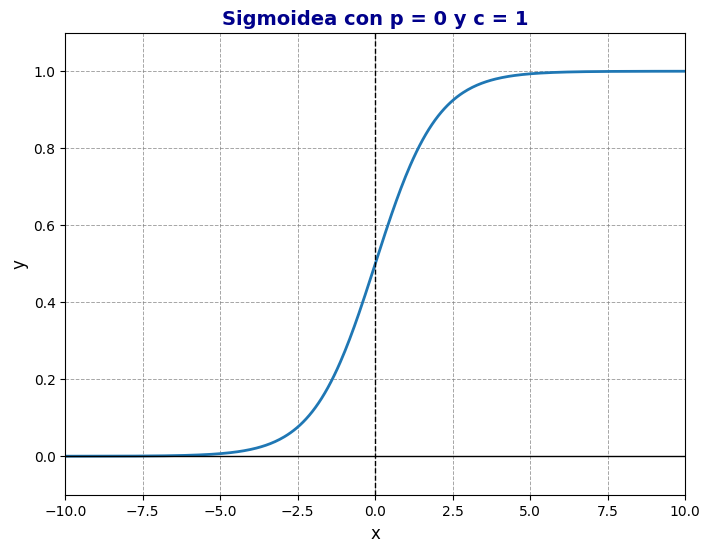

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

graficosigm(ax)

plt.show()

A modo de ilustracion graficamos la Sigmoidea con los valores de p y c por default (0 y 1 respectivamente) lo cual nos da la funcion que ya conocemos, S(x).

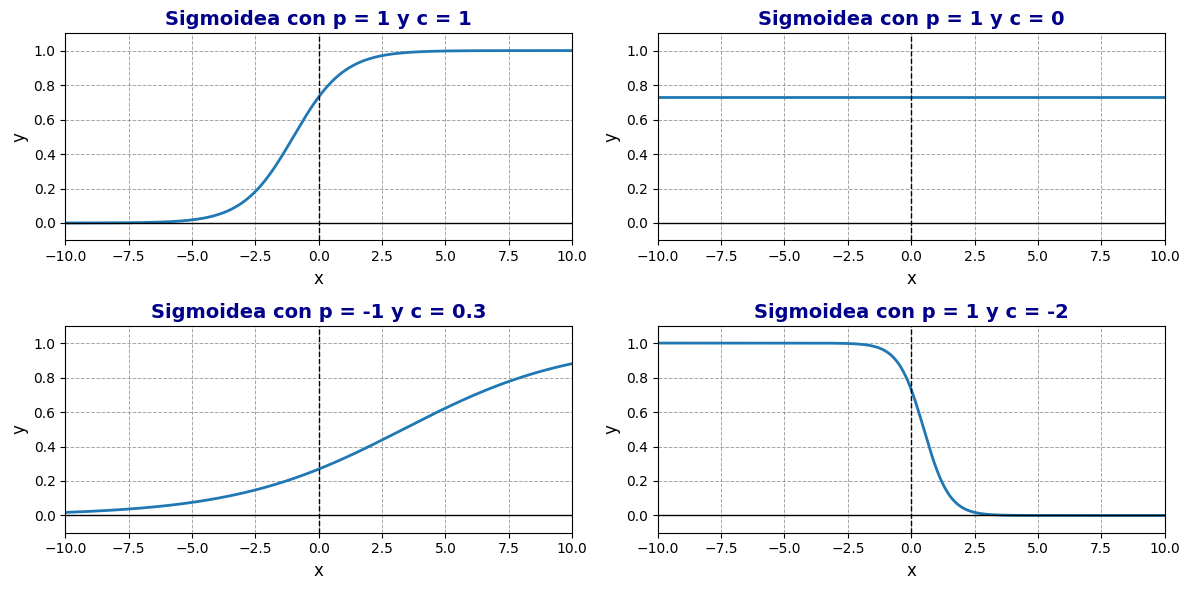

In [5]:
#Ejercicio 1.2
parametros = [(1, 1), (1, 0), (-1, 0.3), (1, -2)]  # valores para (p, c)

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
for i, (p, c) in enumerate(parametros):
    ax = axes[i//2, i%2]
    graficosigm(ax, p, c)

plt.tight_layout()

plt.show()

Analizando que efecto tienen los parámetros ρ y *c* notamos que  ρ actúa como un parámetro de desplazamiento horizontal. Cuando ρ es positivo la curva se desplaza hacia la izquierda, como se puede ver en el subgrafico en el que *c* sigue siendo 1 como en la sigmoidea por default pero ρ aumenta en 1 unidad, desplazando el grafico en 1 unidad a la izquierda. Por otro lado cuando ρ es negativo la curva se desplaza hacia la derecha, lo cual se puede apreciar en el subgrafico donde p = -1. Analizando solo este valor (los cambios generados por *c* los explicamos despues) notamos que ahora el grafico original se desplazo a la derecha en una unidad. En cambio, *c* afecta a la pendiente de la sigmoidea , es decir, qué tan rápida o lenta es la transición de la curva entre 0 y 1. Cuando *c* es positivo y mayor a 1 la transición es mas rápida y pronunciada , cuando es positivo y menor a 1 la curva es mas suave y se empieza a "planchar", como se puede ver en el subgrafico donde *c* = 0,3, en cambio cuando *c* es negativo  invierte la dirección de la sigmoidea, y cuando toma el valor cero la función deja de depender de x y se convierte en una constante que depende de ρ.

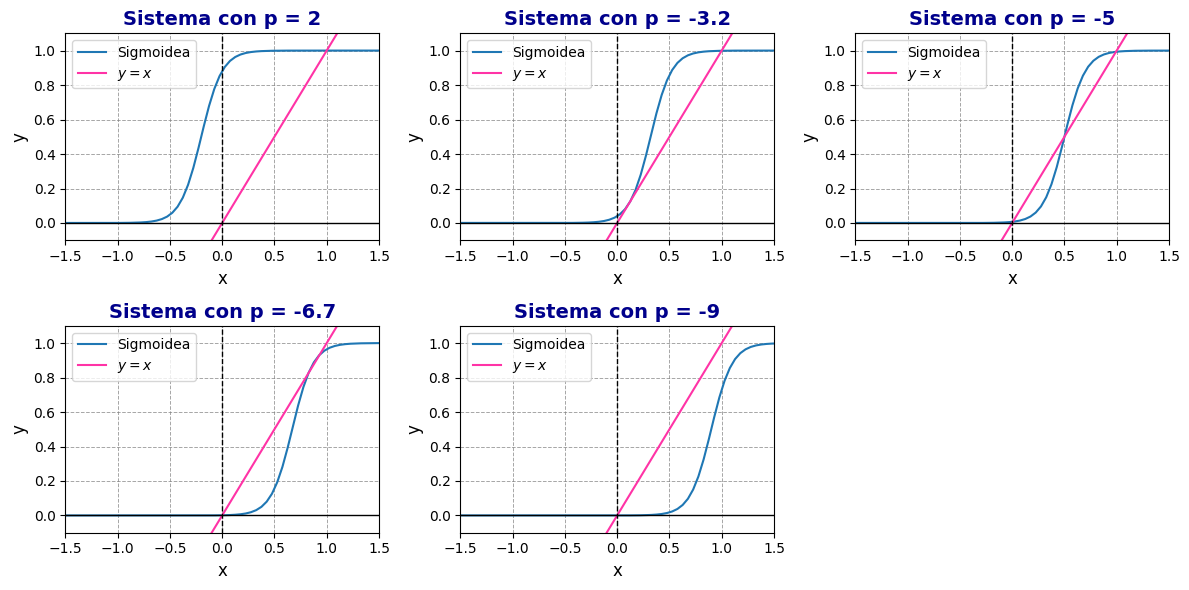

In [7]:
#Ejercicio 1.3
#Funcion que grafica la sigmoidea con c = 10 fijo para distintos valores de p y la recta x=y
def graficosistema(p, ax):
    x = np.linspace(-10, 10, 400)
    y = sigmoidea(x, p, 10)

    ax.plot(x, y, linewidth=1.5, linestyle='-', label='Sigmoidea')

    ax.plot(x, x, color='#ff33a6', linewidth=1.5, linestyle='-', label=r'$y = x$')

    ax.set_title(f'Sistema con p = {p}', fontsize=14, weight='bold', color='darkblue')
    ax.set_xlabel('x', fontsize=12, color='k')
    ax.set_ylabel('y', fontsize=12, color='k')
    ax.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-0.1, 1.1])
    ax.legend()
    ax.axhline(0, color='k', linestyle='-', linewidth=1)
    ax.axvline(0, color='k', linestyle='--', linewidth=1)

valoresp = [2, -3.2, -5, -6.7, -9]
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()

for i, p in enumerate(valoresp):
    graficosistema(p, axes[i])
fig.delaxes(axes[-1])

plt.tight_layout()

plt.show()

En esta gráfica estamos viendo la posibilidad de puntos fijos del sistema para c=10 y varios valores de 𝜌. Para visualizar esto elejimos graficar por un lado la funcion Sigmoidea y por otro la funcion y=x porque nuestro sistema esta formado por la resta entre ellas, por lo tanto de esta manera se pueden apreciar los puntos fijos en los lugares donde la función sigmoidea S(ρ+10x) intersecta la recta y=x, ya que en esos casos la resta entre ellas sera igual a 0.
Analicemos para distintos valores de 𝜌 :


* **𝜌  = 2:** La curva de la sigmoidea se desplaza hacia la izquierda por lo tanto su intersección con la línea y=x se produce cerca del valor x=1. Esto significa que el sistema tiene un punto fijo en ese valor. Para cualquier valor de 𝜌 mayor a aproximadamente el -3.2 va a pasar esto porque la sigmoidea va a estar lo suficientemente a la izquierda como para solo cruzarse a la recta en su parte superior, la cual es muy parecida a una recta constante en y = 1.


* **𝜌  = -3,2:** Ponemos el -3,2 pero es una aproximacion del punto exacto en el que la "panza" de abajo de la sigmoidea tiene pendiente exactamente igual a 1 y por lo tanto se vuelve tangente a la recta. En este punto el punto fijo cercano a 1 sigue estando y ademas aparece uno nuevo generado por esta tangencia.


*  **𝜌  = -5:** Para este valor de 𝜌 la "panza" ya atraveso el punto de tangencia y esto genera la aparicion de un tercer punto fijo, ya que la recta ahora, ademas del punto cercano a 1, cruza 2 veces mas la funcion por arriba y por abajo de la "panza" de abajo. El tercer punto fijo es un valor cercano a 0. Esto pasa para cualquier valor de 𝜌 que este entre (aprox) -3,2 y -6,7.



*   **𝜌  = -6,7:** La sigmoidea se sigue desplazando a la derecha y este punto es analogo al -3,2 , tambien un aproximado del momento exacto en el que la "panza" ahora de arriba tiene pendiente igual a 1 y por lo tanto es tangente a la recta, generando solo 2 puntos fijos, el cercano a 0 y el punto de tangencia. Ahora ya no tenemos el punto fijo cercano a 1 porque la parte superior de la sigmoidea ya esta mas a la derecha que la recta entonces ya no se cruzan.




*  **𝜌  = -9:** Por ultimo este caso tambien es analogo al primero pero ahora la sigmoidea ya esta lo suficientemente a la derecha como para solo cruzar a la recta con su parte inferior, la cual es practicamente una recta constante y = 0. Esto pasa para cualquier valor menor a -6,7 (aprox).




  






In [8]:
#Ejercicio 1.4
def campovector(x,p,c=10):
  return (1/(1+np.exp(-(p+c*x))))-x

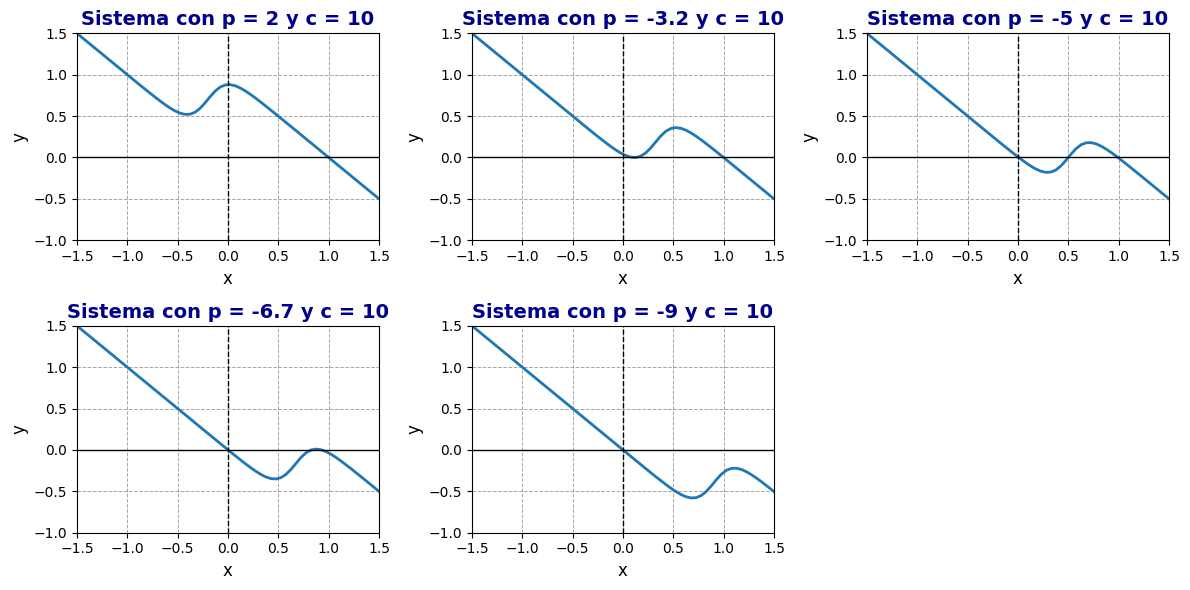

In [9]:
#Funcion que grafica nuestro campovector con c=10 para distintos valores de p
def graficocampovector(p, ax):
    x = np.linspace(-10, 10, 400)
    y = campovector(x, p)

    ax.plot(x, y, linewidth=2, linestyle='-')

    ax.set_title(f'Sistema con p = {p} y c = 10', fontsize=14, weight='bold', color='darkblue')
    ax.set_xlabel('x', fontsize=12, color='k')
    ax.set_ylabel('y', fontsize=12, color='k')
    ax.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1, 1.5])
    ax.axhline(0, color='k', linestyle='-', linewidth=1)
    ax.axvline(0, color='k', linestyle='--', linewidth=1)

valoresp = [2, -3.2, -5, -6.7, -9]
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()

for i, p in enumerate(valoresp):
    graficocampovector(p, axes[i])
fig.delaxes(axes[-1])

plt.tight_layout()

plt.show()

Ahora graficamos el sistema original sin separar en las distintas funciones y vemos que estos graficos se condicen con los anteriores ya que para cada valor de 𝜌 las raices (puntos donde el grafico corta al eje x) estan en los mismos lugares que los puntos de cruce entre las dos funciones que habiamos encontrado en los otros.

In [10]:
#Funcion utilizada en la clase 2 con minimas modificaciones
def puntosfijos(f, p, N=20, round=2, seed=0):
    if seed is not None:
        np.random.seed(seed)
    condiciones_iniciales = np.random.uniform(-1,1,20)
    soluciones = []
    for c in condiciones_iniciales:
        try:
            sol = sp.optimize.newton(f, fprime=None, x0=c, tol=0.0001, maxiter=100, disp=False, args= (p,))
            soluciones.append(sol)
        except RuntimeError:
            pass
    return np.unique(np.array(soluciones).round(round))

In [11]:
def campovectorprima(x,p,c=10):
  return (np.exp(-(p+c*x))*c/((1+np.exp(-(p+c*x)))**2)) - 1

In [12]:
puntosfijosp2 = puntosfijos(campovector,2)
puntosfijospmenos5 = puntosfijos(campovector,-5)
puntosfijospmenos9 = puntosfijos(campovector,-9)

Vamos a analizar los puntos fijos y sus estabilidades para los valores de 𝜌 = 2, 𝜌 = -5 y 𝜌 = -9 ya que van a tener caracteristicas distintas.

In [13]:
def estabilidades(pfs,p):
  pendientes = []
  estabilidad = []
  for pf in pfs:
    pendientes.append(campovectorprima(pf,p))
    estabilidad.append(int(campovectorprima(pf,p) < 0))
  ordenadas = -np.array(pendientes)*np.array(pfs)
  return pendientes,estabilidad,ordenadas

In [14]:
dos = estabilidades(puntosfijosp2,2)
pendientesp2 = dos[0]
estabilidadp2 = dos[1]
ordenadasp2 = dos[2]

menoscinco = estabilidades(puntosfijospmenos5,-5)
pendientespmenos5 = menoscinco[0]
estabilidadpmenos5 = menoscinco[1]
ordenadaspmenos5 = menoscinco[2]

menosnueve = estabilidades(puntosfijospmenos9,-9)
pendientespmenos9 = menosnueve[0]
estabilidadpmenos9 = menosnueve[1]
ordenadaspmenos9 = menosnueve[2]

In [15]:
#Grafico utilizado en clase 1
def graficoestabilidad(p, pfs, pendientes, estabilidad, ordenadas):
  x = np.arange(-1.5, 1.5, 0.01)
  y = campovector(x,p)
  markerfcolors = ['w', '#ff33a6']
  markerecolors = ['#ff33a6', '#ff33a6']
  xmarkerstyle = ['<', '>']

  fig, axs = plt.subplots(1, 2, figsize=(16, 4))

  fig.suptitle(f'Estabilidad puntos fijos p = {p}', fontsize=20, weight='bold', color='darkblue')
  axs[0].vlines(0, ymin=y.min(), ymax=y.max(), colors='k', ls='--', lw=1)
  axs[0].hlines(0, xmin=x.min(), xmax=x.max(), colors='k', ls='-', lw=1)
  axs[0].plot(x, y)
  axs[0].set_xlabel('$x$', fontsize=18)
  axs[0].set_ylabel('$f(x), \dot{x}$', fontsize=18)
  axs[0].grid(True, which='both', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
  for pf in np.arange(len(pfs)):
     epsilon = 0.1
     n = 10
     x_tmp = np.linspace(pfs[pf]-epsilon, pfs[pf]+epsilon, n)
     y_tmp = pendientes[pf]*x_tmp+ordenadas[pf]
     axs[0].plot(x_tmp, y_tmp, '#ff33a6')
     axs[0].arrow(x_tmp[-2], y_tmp[-2], x_tmp[-1]-x_tmp[-2], y_tmp[-1]-y_tmp[-2],
              shape='full', color='#ff33a6', lw=0, length_includes_head=True, head_width=.06)
     axs[0].plot(pfs[pf], 0, marker='o',
             markerfacecolor=markerfcolors[estabilidad[pf]], markeredgecolor=markerecolors[estabilidad[pf]])


  axs[1].vlines(0, ymin=y.min(), ymax=y.max(), colors='k', ls='--', lw=1)
  axs[1].hlines(0, xmin=x.min(), xmax=x.max(), colors='k', ls='-', lw=1)
  axs[1].plot(x, y)

  for pf in np.arange(len(pfs)):
     puntosfijos_sorted = np.sort(pfs)
     if puntosfijos_sorted[pf] == puntosfijos_sorted.min():
        x_markers_tmp = [x[0]+(puntosfijos_sorted[pf]-x[0])/2]
     elif puntosfijos_sorted[pf] == puntosfijos_sorted.max():
        x_markers_tmp = [x[-1]-(x[-1]-puntosfijospmenos5[pf])/2]
     else:
        x_markers_tmp = [puntosfijos_sorted[pf]-(puntosfijos_sorted[pf]-puntosfijos_sorted[pf-1])/2,
                        puntosfijos_sorted[pf]+(puntosfijos_sorted[pf+1]-puntosfijos_sorted[pf])/2]
     axs[1].plot(pfs[pf], 0, marker='o',
             markerfacecolor=markerfcolors[estabilidad[pf]], markeredgecolor=markerecolors[estabilidad[pf]])
     for i in np.arange(len(x_markers_tmp)):
        axs[1].plot(x_markers_tmp[i], 0, c='k', marker=xmarkerstyle[int(campovector(x_markers_tmp[i],p) > 0)])
  axs[1].plot(1.25, 0, c='k', marker=xmarkerstyle[0])
  axs[1].set_xlabel('$x$', fontsize=18)
  axs[1].set_ylabel('$f(x), \dot{x}$', fontsize=18)
  axs[1].grid(True, which='both', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)

  plt.tight_layout()
  plt.show()

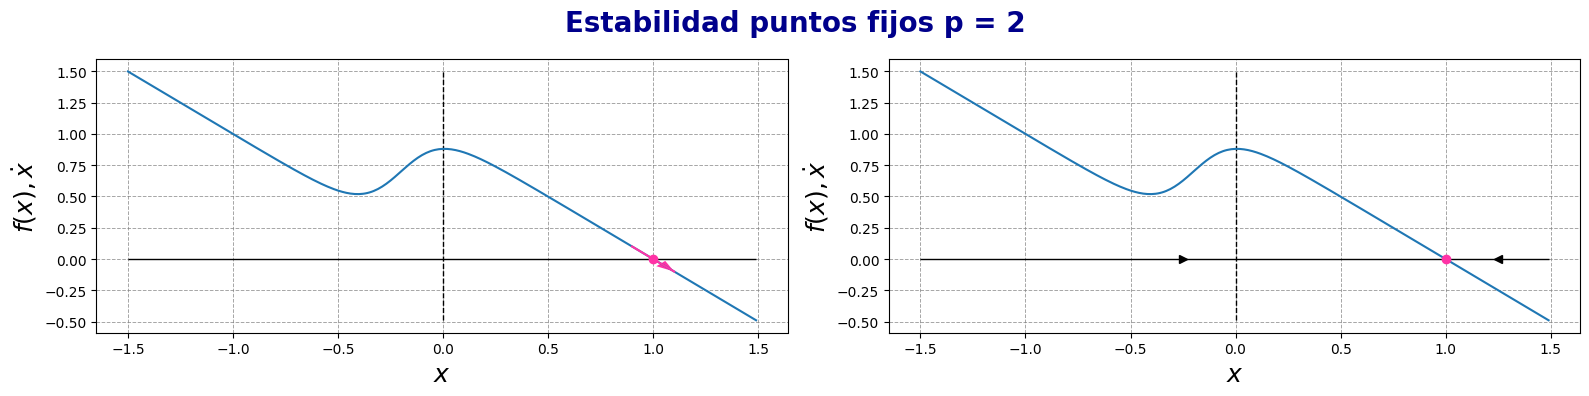

In [16]:
graficoestabilidad(2, puntosfijosp2, pendientesp2, estabilidadp2, ordenadasp2)

En este grafico podemos observar el punto fijo en x = 1 (o un valor cercano) que es estable. Esto se debe a que la derivada del campo vector evaluada en el punto fijo da un resultado negativo y en nuestro grafico estamos pidiendo que si esto es asi, el punto rosa que esta sobre el punto fijo se vea "relleno". La flecha que sigue la funcion en el primer grafico es la pendiente y como esta es la derivada evaluada en el punto fijo y dijimos que era negativa, la flecha apunta para abajo. En el segundo grafico ademas agregamos las flechas negras que muestran el movimiento del flujo el cual va (de ambos lados) hacia el punto fijo, tambien condiciendose con su estabilidad.

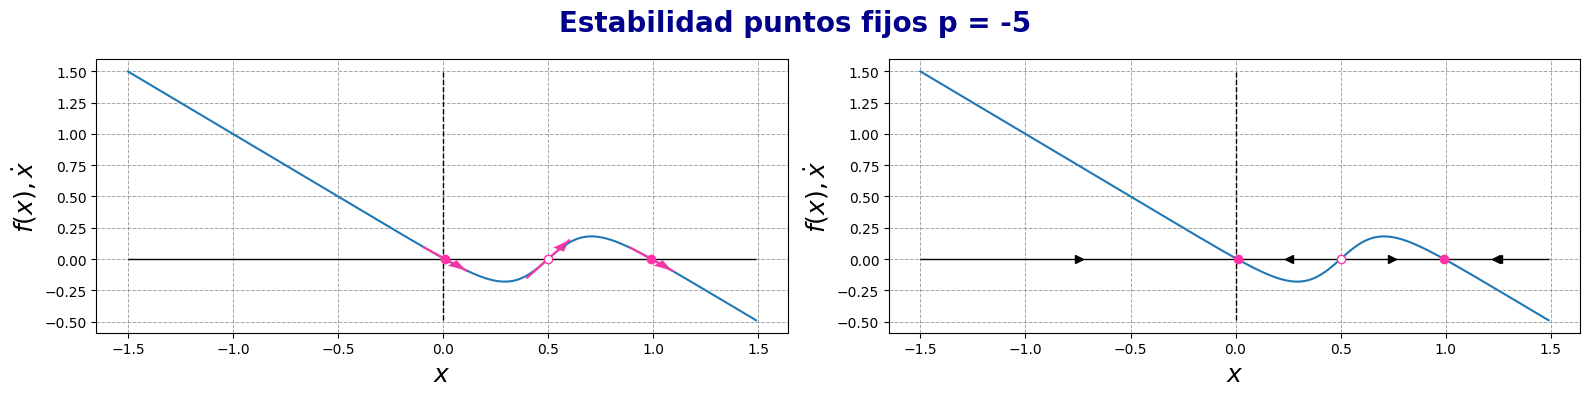

In [17]:
graficoestabilidad(-5, puntosfijospmenos5, pendientespmenos5, estabilidadpmenos5, ordenadaspmenos5)

Para 𝜌 = -5 tenemos una situacion diferente ya que hay 3 puntos fijos. En x=0 y x=1 el punto fijo es estable, pasa lo mismo que describimos para el punto fijo del grafico anterior, en cambio el que esta en aproximadamente x=0,5 es inestable. Esto lo notamos en su pendiente positiva (flecha para arriba) ya que la derivada en ese punto dio positiva y por eso el punto esta sin rellenar. En el segundo grafico ademas vemos el movimiento del flujo el cual se "acerca" a los puntos en x=0 y x=1 pero se "aleja" de x=0,5, tambien reflejando su estabilidad e inestabilidad.

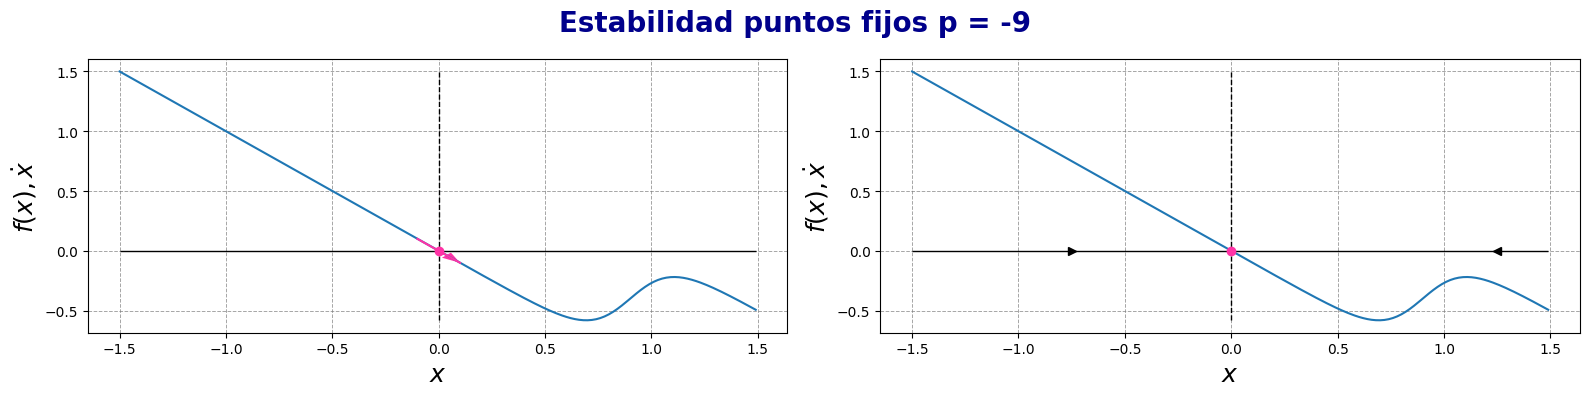

In [18]:
graficoestabilidad(-9, puntosfijospmenos9, pendientespmenos9, estabilidadpmenos9, ordenadaspmenos9)

Este caso es analogo a 𝜌=2 solo que el punto fijo se encuentra en x=0, siendo este tambien estable.





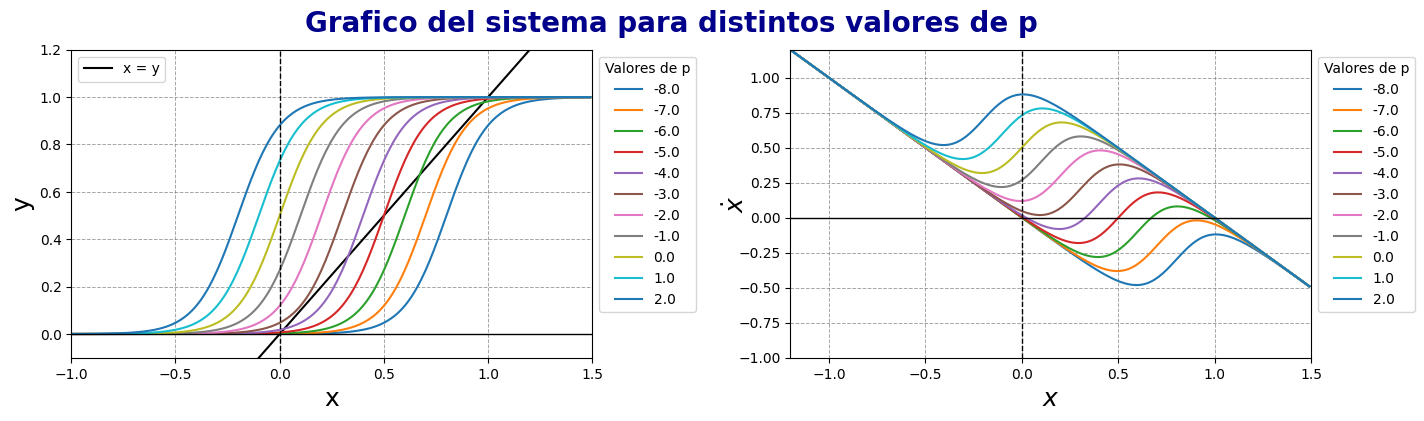

In [19]:
#Graficos hechos en clase
x = np.arange(-1.2, 1.5, 0.01)
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

fig.suptitle(f'Grafico del sistema para distintos valores de p', fontsize=20, weight='bold', color='darkblue')
recta, = axs[0].plot(x, x, 'k')
ps = np.arange(-8, 2.1, 1)
for p in ps:
    axs[0].plot(x, sigmoidea(x, p, 10),label=str(p))
    y = campovector(x, p)
    axs[1].plot(x, y,label=str(p))
axs[0].set_xlabel('x', fontsize=18)
axs[0].set_ylabel('y', fontsize=18)
axs[0].set_label('grafico sistema distintos p')
legend1 = axs[0].legend(bbox_to_anchor=(1, 1),loc='upper left', title='Valores de p')

legend2 = axs[0].legend([recta], ['x = y'])

axs[0].add_artist(legend1)
axs[0].axvline(0, color='k', linestyle='--', linewidth=1)
axs[0].axhline(0, color='k', linestyle='-', linewidth=1)
axs[0].set_xlim(-1,1.5)
axs[0].set_ylim(-0.1,1.2)
axs[0].grid(True, which='both', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)


axs[1].set_xlabel('$x$', fontsize=18)
axs[1].set_ylabel('$\dot{x}$', fontsize=18)
axs[1].yaxis.set_label_coords(-0.08, 0.5)
axs[1].legend(bbox_to_anchor=(1, 1),title='Valores de p')
axs[1].axvline(0, color='k', linestyle='--', linewidth=1)
axs[1].axhline(0, color='k', linestyle='-', linewidth=1)
axs[1].set_xlim(-1.2,1.5)
axs[1].set_ylim(-1,1.2)
axs[1].grid(True, which='both', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)

plt.subplots_adjust(wspace=0.38)

plt.show()

En estos graficos podemos visualizar al mismo tiempo la diferencia entre el sistema para varios valores distintos de 𝜌. Se puede apreciar el desplazamiento que genera este parametro y como van variando los puntos fijos coincidiendo con los graficos y explicaciones que estuvimos dando en incisos anteriores.

In [20]:
#Funcion sacada de clase 2
def derivar(f,x0,method='central',h=0.01):
  if (method == 'central'):
    return (f(x0+h)-f(x0-h)) / (2*h)
  if (method == 'forward'):
    return (f(x0+h)-f(x0)) / h
  if (method == 'backward'):
    return (f(x0)-f(x0-h)) / h

<ipython-input-8-1319739faf77>:3: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-(p+c*x))))-x


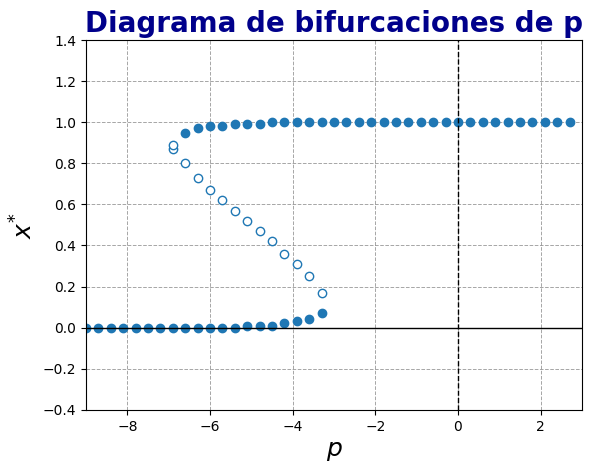

In [21]:
#Grafico hecho en clase
markerfcolors = ['w', 'C0']
markerecolors = ['C0', 'C0']
x = np.arange(-1.5, 1.5, 0.01)

ps = np.arange(-9, 3, 0.3)
for p in ps:
    pfs = puntosfijos(campovector, p)
    pendientes = []
    for x0 in pfs:
        if (campovector(x0,p) < 0.01):
          d = derivar(lambda x: campovector(x,p), x0)
          pendientes.append(d)
          plt.plot(p, x0, 'o', markerfacecolor=markerfcolors[int(d < 0)], markeredgecolor=markerecolors[int(d < 0)])
plt.xlabel('$p$', fontsize=18)
plt.ylabel('$x^{*}$', fontsize=18)
plt.title('Diagrama de bifurcaciones de p', fontsize=20, weight='bold', color='darkblue')
plt.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
plt.axvline(0, color='k', linestyle='--', linewidth=1)
plt.axhline(0, color='k', linestyle='-', linewidth=1)
plt.xlim(-9,3)
plt.ylim(-0.4,1.4)
plt.show()

Este grafico representa el diagrama de bifurcaciones del parametro 𝜌 para el sistema con c = 10. Podemos ver en funcion del valor de 𝜌 donde estan el/los punto/s fijo/s. Como dijimos antes aca tambien podemos distinguir que para 𝜌 menores a aprox -6,7 tenemos un solo punto fijo estable en x=0, para 𝜌 entre (aprox) -6,7 y -3,2 tenemos 3 puntos fijos, uno en x=0 estable, otro en x=1 estable y el otro depende del valor de 𝜌 pero esta entre 0 y 1 y es inestable. No se llega a distinguir porque son momentos muy exactos pero los lugares donde estaria los vertices de ambas curvas serian los momentos en los que solo hay 2 puntos fijos. El vertice de la curva de abajo seria el momento cuando tenemos el punto fijo en x=1 y el otro cercano a 0 y el vertice de la curva de arriba seria el momento cuando tenemos el punto fijo en x=0 y el otro cercano a 1.

Si miramos cada curva aislada de la otra, podemos notar que cada una de ellas esta representando una bifurcacion de tipo nodo silla, ya que es una parabola con un punto estable y el otro inestable en los momentos en que hay 2, luego tenemos el momento exacto en que hay 1 solo y aca esta la bifurcacion y despues no hay puntos fijos.

Pusimos una cota para limpiar los artefactos en las raíces encontradas.

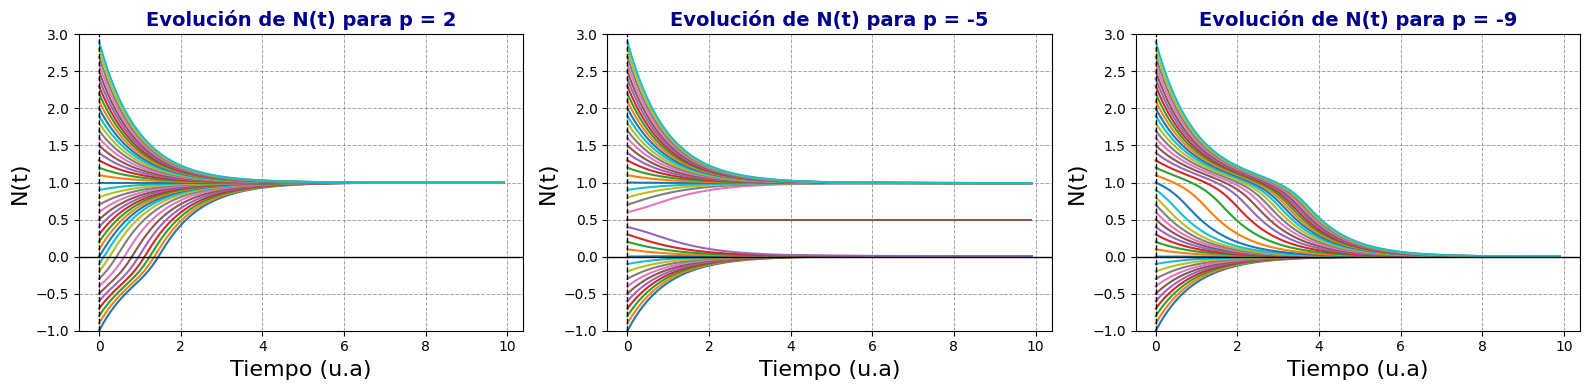

In [22]:
#Ejercicio 1.5
#Grafico hecho en clase
condiciones_iniciales = np.arange(-1,3,0.1)
dt = 0.1
t = np.arange(0, 10, step=dt)
valores_p = [2, -5, -9]

fig, axs = plt.subplots( 1, len(valores_p), figsize=(16, 4))

for idx, p in enumerate(valores_p):
    for ci in condiciones_iniciales:
        N = np.zeros_like(t)
        N[0] = ci
        for i in range(len(t) - 1):
            N[i + 1] = campovector(N[i], p) * dt + N[i]
        axs[idx].plot(t, N)

    axs[idx].set_title(f'Evolución de N(t) para p = {p}',fontsize=14, weight='bold', color='darkblue')
    axs[idx].set_xlabel("Tiempo (u.a)", fontsize=16)
    axs[idx].set_ylabel("N(t)", fontsize=16)
    axs[idx].set_ylim(-1, 3)
    axs[idx].grid(True, which='both', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
    axs[idx].axvline(0, color='k', linestyle='--', linewidth=1)
    axs[idx].axhline(0, color='k', linestyle='-', linewidth=1)

plt.tight_layout()
plt.show()

En estos graficos podemos ver la evolucion temporal para distintas condiciones iniciales integrando con el metodo de Euler.

En el primer grafico tenemos 𝜌=2, como vimos anteriormente para este sistema encontramos un solo punto fijo en x=1 por lo tanto no importa cual sea la condicion inicial podemos ver como la solucion converge a ese punto a lo largo del tiempo.

En el segundo grafico tenemos 𝜌=-5, como vimos anteriormente para este sistema encontramos 3 puntos fijos, 2 estables y 1 inestable. Como podemos ver las condiciones iniciales que son mayores a 1 convergen inmediatamente al punto fijo ubicado en x=1. Lo mismo pasa con las condiciones iniciales menores a 0 y el punto fijo en x=0. Por otro lado las condiciones iniciales que estan entre 0 y 1 convergen a estos puntos fijos respectivamente debido a su estabilidad y al hacer esto divergen del punto x=0,5, debido a su inestabilidad. Igualmente distinguimos que la condicion inicial que empieza en 0,5 a lo largo del tiempo no evoluciona mostrando que es efectivamente un punto fijo.

En el tercer grafico tenemos una situacion nuevamente analoga al primero, todas las condiciones iniciales convergen al unico punto fijo estable ubicado en x=0.

---
# Ejercicio 2

Sea el siguiente sistema 2D

$$
\dot{x} = - x - x^{2} - y \\
\dot{y} = x - y
$$

2.1. Defina el sistema con una función de Python.

2.2. Busque puntos fijos a partir del estudio gráfico de las nulclinas. Para el gráfico de las nulclinas use `plt.contour` para levels=[0].

2.3. Busque numéricamente los puntos fijos con `fsolve` de Scipy.

2.4. Defina una función de Python genérica que tenga la matriz Jacobiana en función de valores de "x" e "y". Evalúe la matriz en los puntos fijos y estudie su estabilidad. Qué tipo de puntos fijos son?

2.5. Grafique el campo vector usando `plt.streamplots`. Interprete las líneas de campo obtenidas en referencia al item anterior.

2.6. Encuentre trayectorias en el espacio de fases que describan comportamientos del sistema. Para esto resuelva el sistema, usando `solve_ivp`. Use pasos largos, tiempos de integración muy cortos. Elija estos valores y las condiciones iniciales criteriosamente, de manera tal de reforzar los resultados previos, mostrando qué tipos de elementos dinámicos presenta el sistema en base a sus observaciones.

In [23]:
#Ejercicio 2.1
def sistema2(t, z):
    x = z[0]
    y = z[1]
    dxdt = -x - (x**2) - y
    dydt = x-y
    return [dxdt, dydt]

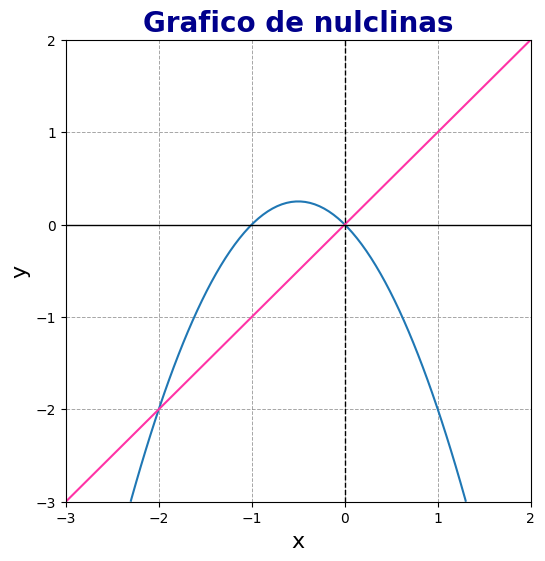

In [29]:
#Ejercicio 2.2
#Grafico hecho en clase
x = np.linspace(-3, 2, 100)
y = np.linspace(-3, 2, 100)
XX, YY = np.meshgrid(x, y)
DX, DY = sistema2(0, [XX, YY])

fig, ax = plt.subplots(figsize=(6,6))
plt.contour(XX, YY, DX, levels=[0], colors = ['C0'])
plt.contour(XX, YY, DY, levels=[0], colors=['#ff33a6'])

ax.set_title('Grafico de nulclinas', fontsize=20, weight='bold', color='darkblue')
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
ax.axvline(0, color='k', linestyle='--', linewidth=1)
ax.axhline(0, color='k', linestyle='-', linewidth=1)
plt.show()


Las nulclinas son las curvas para las cuales cada ecuacion de nuestro sistema es igual a 0. Por un lado tenemos la parabola $$ y = -(x^{2} + x) $$ para la primer ecuacion y por otro lado la recta $$ y = x $$ para la segunda ecuacion. Los puntos fijos se encuentran en las intersecciones entre ambas funciones.

In [32]:
#Ejercicio 2.3
#Funcion sacada de clase 4
#CORRERLO DOS VECES PARA QUE QUEDEN NUMEROS REDONDOS DE RESULTADO.
def sistema_nulclinas_sin_t(z):
    return sistema2(0, z)

N = 5

x0s = np.random.uniform(low=-2, high=0, size=(N,))
y0s = np.random.uniform(low=-2, high=0, size=(N,))

raices = []
for x0, y0 in zip(x0s, y0s):
    z0 = [x0, y0]
    raices.append(fsolve(sistema_nulclinas_sin_t, z0))

raices = np.array(raices)

tolerancia = 1e-2
raices_filtradas = []
for r in raices:
    if not any(np.linalg.norm(r - rf) < tolerancia for rf in raices_filtradas):
        raices_filtradas.append(r)

raices_filtradas = np.array(raices_filtradas)

print("Raíces encontradas:")
print(raices_filtradas)

Raíces encontradas:
[[-2. -2.]
 [ 0.  0.]]


Podemos ver que estas raices coinciden con el grafico anterior.

In [33]:
#Ejercicio 2.4
def jacobiana(x,y):
  return np.array([[-1-2*x, -1],[1,-1]])

In [36]:
print("Jacobiana evaluada en (0,0):")
print(jacobiana(0,0))
print("Jacobiana evaluada en (-2,-2):")
print(jacobiana(-2,-2))

Jacobiana evaluada en (0,0):
[[-1 -1]
 [ 1 -1]]
Jacobiana evaluada en (-2,-2):
[[ 3 -1]
 [ 1 -1]]


In [39]:
for z in raices_filtradas:

  eigenvalues, eigenvectors = np.linalg.eig(jacobiana(z[0],z[1]))

  print(f"Autovalores para punto fijo {z}:")
  print(eigenvalues)

  print(f"\nAutovectores para punto fijo {z}:")
  print(eigenvectors)
  print("\n")

Autovalores para punto fijo [-2. -2.]:
[ 2.73205081 -0.73205081]

Autovectores para punto fijo [-2. -2.]:
[[0.96592583 0.25881905]
 [0.25881905 0.96592583]]


Autovalores para punto fijo [0. 0.]:
[-1.+1.j -1.-1.j]

Autovectores para punto fijo [0. 0.]:
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]




Calculamos autovalores y autovectores para las matrices jacobianas evaluadas en cada uno de los puntos fijos, notamos que no dan numeros exactos pero para el objetivo de este trabajo no influye asi que lo pasamos por alto.

Para el punto fijo (-2,-2) tenemos un autovalor negativo y otro positivo, la presencia del positivo implica que el punto fijo es inestable en general, ya que hay al menos una dirección en la que el sistema se aleja de este, este tipo de puntos se denominan punto silla. Las trayectorias al rededor de él se alejan en forma de funciones homograficas siguiendo el flujo en la direccion que indican los autovalores porque hacen un recorrido "al estilo" de estas funciones. Para el autovalor negativo, su autovector asociado va a ser estable por lo tanto el flujo va a ir en direccion hacia el punto fijo, pero como el autovector asociado al autovalor positivo es inestable, las trayectorias terminan alejandose.

Por otro lado para el punto fijo (0,0) tenemos dos autovalores imaginarios. La componente real negativa indica que el sistema es estable; las soluciones tienden a acercarse al punto fijo a medida que avanza el tiempo. La componente imaginaria sugiere un comportamiento oscilatorio alrededor del punto fijo. Esto significa que las soluciones no solo se aproximan al punto fijo, sino que lo hacen en forma de espiral. Por lo tanto, el punto fijo se clasifica como un foco espiral estable. Las trayectorias en el espacio de fases girarán alrededor del punto fijo en espirales que se contraen hacia el origen (el punto fijo).

En relación a los autovectores, cuando presentan una parte imaginaria como en este caso, la trayectoria no se dirige simplemente en línea recta hacia el punto fijo, sino que describe un giro a medida que se acerca.

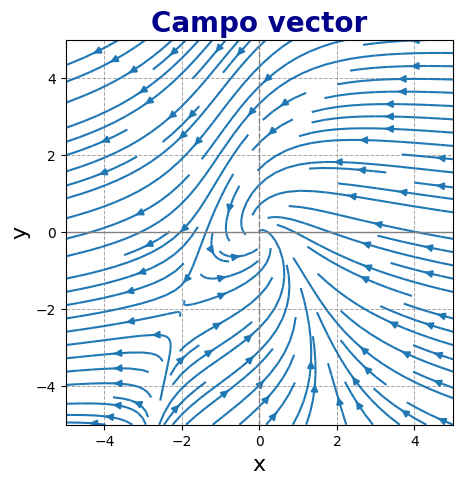

In [40]:
#Ejercicio 2.5
#Grafico hecho en clase
XX, YY = np.meshgrid(np.linspace(-5., 5., 100), np.linspace(-5.,5., 100))
DX, DY = sistema2(0, [XX, YY])
fig = plt.figure(figsize=(5,5))
plt.streamplot(XX, YY, DX, DY, density=1, arrowsize=1)
plt.title('Campo vector', fontsize=20, weight='bold', color='darkblue')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.axhline(0, color='gray', linestyle='-', linewidth=1)
plt.show()

Podemos observar los movimientos oscilatorios alrededor del punto (0,0) y ademas que las flechas indican el flujo moviendose hacia el punto, coincidiendo con su estabilidad notada en el item anterior. Ademas se pueden apreciar las trayectorias del estilo "homograficas" cerca del punto (-2,-2) y como estas se alejan de él, coincidiendo con su inestabilidad notada en el item anterior tambien.

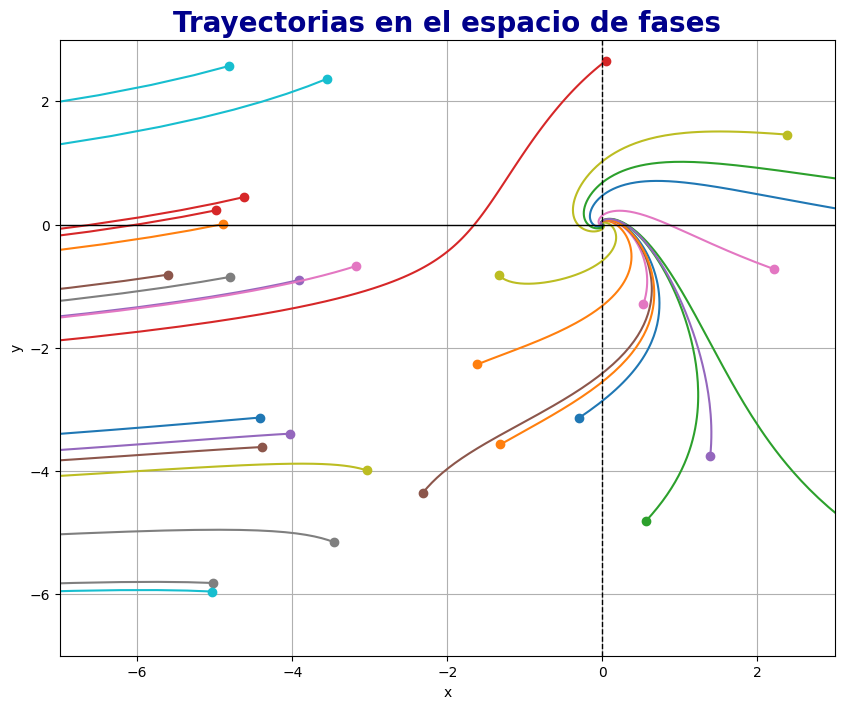

In [41]:
#Ejercicio 2.6
#Grafico hecho en clase con algunas modificaciones
N = 30

x0s = np.random.uniform(low=-6, high=4, size=(N,))
y0s = np.random.uniform(low=-6, high=3, size=(N,))

t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 500)

plt.figure(figsize=(10, 8))
for x0, y0 in zip(x0s, y0s):
    z0 = [x0,y0]
    sol = sp.integrate.solve_ivp(sistema2, t_span, z0, t_eval=t_eval, method='RK45', max_step=0.05)
    line, = plt.plot(sol.y[0], sol.y[1])
    plt.plot(x0, y0, 'o', color=line.get_color(), markersize=6)


plt.title('Trayectorias en el espacio de fases', fontsize=20, weight='bold', color='darkblue')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-7, 3)
plt.ylim(-7, 3)
plt.axvline(0, color='k', linestyle='--', linewidth=1)
plt.axhline(0, color='k', linestyle='-', linewidth=1)
plt.grid()
plt.show()

En este grafico podemos ver las trayectorias a lo largo del tiempo para distintas condiciones iniciales. Las condiciones mas alejadas del punto (0,0) vemos como se siguen alejando de este y tambien del (-2,-2), ya que no estan lo suficientemente cerca del primero como para converger y el segundo al ser inestable las aleja. Por otro lado las condiciones mas cercanas al (0,0) convergen con movimientos oscilatorios a este punto, inlcuso las que estan mas cerca del (-2,-2), lo cual nuevamente se debe a su inestabilidad y a su vez a la estabilidad del (0,0).

---
# Ejercicio 3

**Modelo SIR**

Para modelar la evolución de una infección en una población se la puede dividir en tres grupos: los *susceptibles* de contraer la enfermedad ($S$), los *infectados* ($I$) y los *recuperados* ($R$). La relación entre el número de personas en cada grupo está definida por el siguiente sistema de ODEs:

$$
\frac{dS}{dt} = -\beta \frac{S\,I}{N}\\
\frac{dI}{dt} = \beta \frac{S\,I}{N} - \gamma\, I\\
\frac{dR}{dt} = \gamma\, I
$$

con $\beta$ y $\gamma$ las tasas de infección y recuperación respectivamente y $N$ la población total.

3.1. Considerar que la población de $N = 10000$ habitantes e inicialmente todas las personas son susceptibles. Supondremos una tasa de transmisión $\beta=0.2$ y un tiempo medio de recuperación de 10 días (es decir, una tasa $\gamma$ de 1/10). Si inicialmente hay una única persona enferma, discutir de qué forma deberían evolucionar las poblaciones de cada grupo. [Hint: considere que todas las personas que no están enfermas son susceptibles].

3.2. Asumiendo que no se producen fallecimientos, verificar que la población de la ciudad se mantiene constante a lo largo de la simulación.

3.3. Determinar el tiempo a partir del cual, sin acciones externas, la cantidad de infecciones llega a su máximo y comienza a descender (calcular, no hacer a ojo). Mostrar cuál sería ese momento en la curva de I(t).

---

In [42]:
def ODEs(t, p, beta, sigma, N):
  S = p[0]
  I = p[1]
  R = p[2]
  S_punto = -beta*((S*I)/N)
  I_punto = beta*((S*I)/N) -sigma*I
  R_punto = sigma*I
  return S_punto, I_punto, R_punto

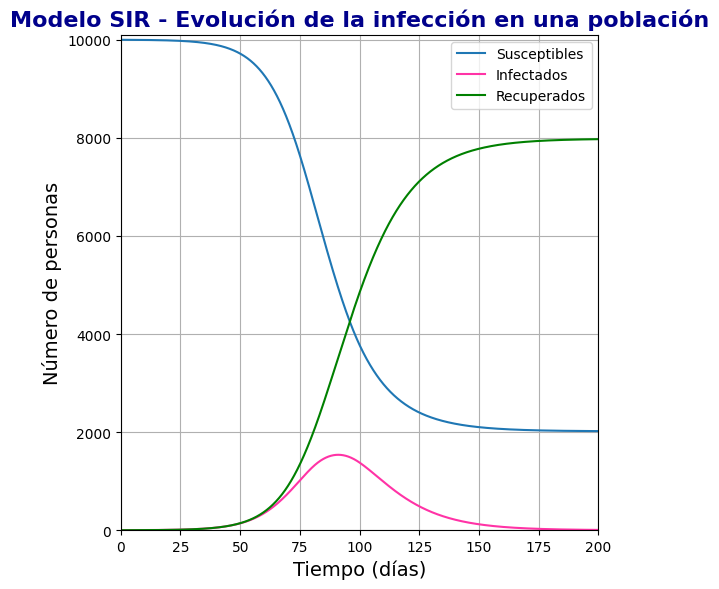

In [43]:
# Ejercicio 3.1
#Grafico hecho en clase
dt = 0.01
tmax = 200
t = np.arange(0, tmax, dt)
si = 9999
ii = 1
ri = 0
ti = t[0]
pi = [si, ii, ri]

fig, axs = plt.subplots(1, 1, figsize=(6, 6))
sol = sp.integrate.solve_ivp(ODEs, [t[0], t[-1]], pi, t_eval=t, method='RK45', args=(0.2, 0.1, 10000))
axs.plot(sol.t, sol.y[0], label='Susceptibles', color='C0')
axs.plot(sol.t, sol.y[1], label='Infectados', color='#ff33a6')
axs.plot(sol.t, sol.y[2], label='Recuperados', color='g')

axs.set_title('Modelo SIR - Evolución de la infección en una población', fontsize=16, weight='bold', color='darkblue')
axs.set_xlabel('Tiempo (días)', fontsize=14)
axs.set_ylabel('Número de personas', fontsize=14)
axs.set_xlim([0, 200])
axs.set_ylim([0, 10100])
axs.legend()

plt.grid()
plt.tight_layout()
plt.show()

En el gráfico, se observa la evolución de tres grupos de una población inicial de 10,000 personas a lo largo de 200 días, con 9,999 individuos susceptibles, 1 infectado y 0 recuperados al inicio. Analicemos cada grupo en detalle:


* **Susceptibles**: Al comienzo, toda la población es susceptible al contagio con excepcion de la unica persona infectada. Sin embargo, a medida que el tiempo avanza, este número disminuye, llegando a un mínimo de aproximadamente 2,000 personas. Esto refleja el proceso de contagio, en el cual los individuos susceptibles se infectan y luego dejan de ser susceptibles, por lo tanto los unicos que restan en este grupo son las personas que no han contraído la enfermedad.

* **Infectados:**Con el tiempo el número de infectados aumenta rápidamente, alcanzando un pico entre los días 75 y 100. Este crecimiento se debe a la tasa de transmisión y el tiempo de recuperación promedio de la enfermedad.Después del pico, la cantidad de personas infectadas comienza a disminuir, ya que el número de susceptibles se reduce y la recuperación se acelera.

* **Recuperados:** La curva de recuperados inicia en cero y aumenta a medida que las personas infectadas se recuperan. El mayor momento de crecimiento se produce al mismo tiempo que el pico en los infectados porque a mayor cantidad de personas infectadas, mayor cantidad de personas se van a recuperar. Eventualmente, el número de recuperados se estabiliza en alrededor de 8,000, indicando que una gran parte de la población ha adquirido inmunidad y ya no puede contraer la enfermedad nuevamente.

El gráfico muestra claramente cómo la enfermedad se propaga inicialmente en una población completamente susceptible, generando un pico de infectados seguido por una estabilización en la fase de recuperación. Al final, aproximadamente 2,000 personas nunca se infectaron, y el número de susceptibles se estabiliza. Esto implica que la mayoría de la población ha sido expuesta a la enfermedad y se ha recuperado, quedando inmunizada. Así, la dinámica del contagio se detiene gradualmente una vez que se alcanza el equilibrio entre los grupos de susceptibles, infectados y recuperados.

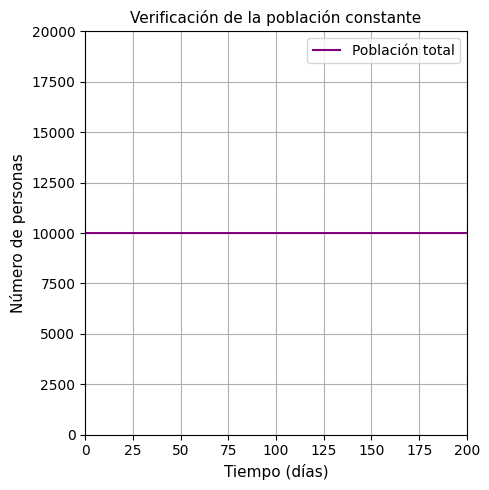

In [44]:
# Ejercicio 3.2
poblacion_total = sol.y[0] + sol.y[1] + sol.y[2]

fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.plot(sol.t, poblacion_total, label='Población total', color='purple')

axs.set_title('Verificación de la población constante', fontsize=11)
axs.set_xlabel('Tiempo (días)', fontsize=11)
axs.set_ylabel('Número de personas', fontsize=11)
axs.set_xlim([0, 200])
axs.set_ylim([0, 20000])
axs.legend()

plt.grid()
plt.tight_layout()
plt.show()

Dado que asumimos que no ocurren fallecimientos y que las personas solo pasan de susceptibles a infectados y luego a recuperados, la población permanece constante, sin alteraciones en su valor inicial.

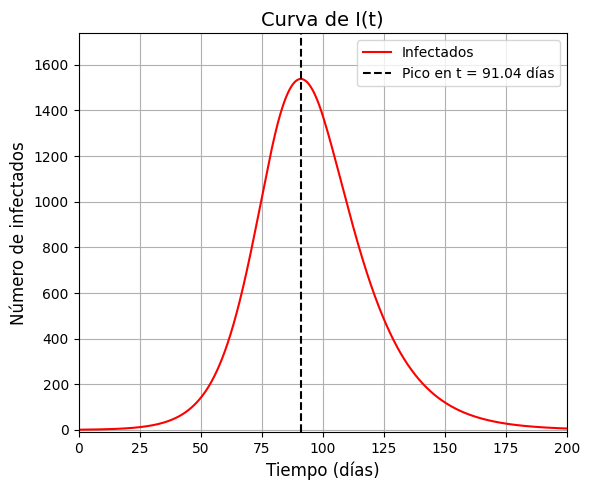

In [45]:
# Ejercicio 3.3
pico = np.argmax(sol.y[1])
tiempodepico = sol.t[pico]

fig, axs = plt.subplots(1, 1, figsize=(6, 5))
axs.plot(sol.t, sol.y[1], label='Infectados', color='r')
axs.axvline(x=tiempodepico, color='k', linestyle='--', label=f'Pico en t = {tiempodepico:.2f} días')

axs.set_title('Curva de I(t)', fontsize=14)
axs.set_xlabel('Tiempo (días)', fontsize=12)
axs.set_ylabel('Número de infectados', fontsize=12)
axs.set_xlim([0, 200])
axs.set_ylim([-10, max(sol.y[1]) + 200])
axs.legend()

plt.grid()
plt.tight_layout()
plt.show()

El gráfico muestra que, sin medidas externas, el número de personas infectadas llega a su punto máximo en el día 91 (el calculo del pico de la curva da 91,04 pero como son dias lo redondeamos). A partir de este momento, la cantidad de infectados empieza a descender de manera gradual, debido al incremento de personas recuperadas, lo cual reduce la probabilidad de nuevas infecciones.